In [22]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
image = cv2.imread("hw1Pic.bmp")

In [23]:
def linear_change(pixel):
    process_pixel = 2 * pixel 
    pixel_new = min(255,process_pixel)
    return pixel_new
def piecewise_linear_change(pixel):
    if pixel < 40:
        process_pixel = 2 * pixel
        pixel_new = min(255,process_pixel)
        return pixel_new
    else:
        process_pixel = int(0.5 * pixel + 0.5)
        return process_pixel
def non_linear_change(pixel):
    pixel_new = min(255,math.pow(pixel,2))
    return pixel_new

In [24]:
LUT_Linear = np.zeros(256)
LUT_pLinear = np.zeros(256)
LUT_noLinear = np.zeros(256)

for pixel in range(256):
    LUT_Linear[pixel] = linear_change(pixel)
    LUT_pLinear[pixel] = piecewise_linear_change(pixel)
    LUT_noLinear[pixel] = non_linear_change(pixel)

In [25]:
width,height,channel = image.shape
imageLinear = np.zeros((width,height,channel),np.uint8)
imagePLinear = np.zeros((width,height,channel),np.uint8)
imageNoLinear = np.zeros((width,height,channel),np.uint8)
for x in range(width):
    for y in range(height):
        imageLinear[x,y] = (LUT_Linear[image[x,y][0]],LUT_Linear[image[x,y][1]],LUT_Linear[image[x,y][2]])
        imagePLinear[x,y] = (LUT_pLinear[image[x,y][0]],LUT_pLinear[image[x,y][1]],LUT_pLinear[image[x,y][2]])
        imageNoLinear[x,y] = (LUT_noLinear[image[x,y][0]],LUT_noLinear[image[x,y][1]],LUT_noLinear[image[x,y][2]])

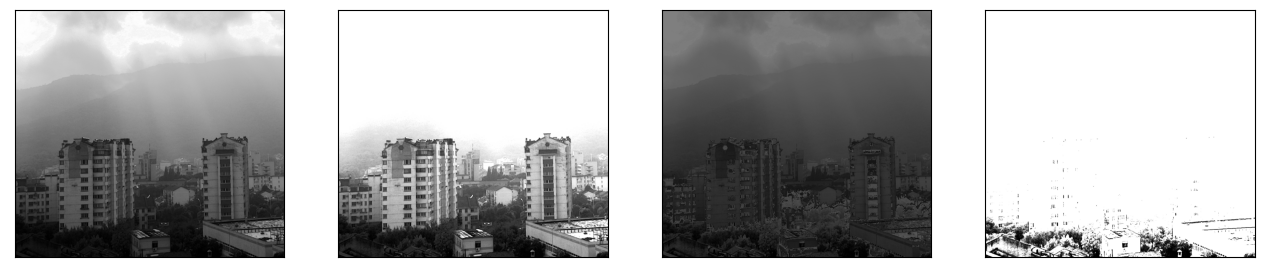

In [26]:
imageShow = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
imageLinearShow = cv2.cvtColor(imageLinear,cv2.COLOR_BGR2RGB)
imagePLinearShow = cv2.cvtColor(imagePLinear,cv2.COLOR_BGR2RGB)
imageNoLinearShow = cv2.cvtColor(imageNoLinear,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,4))
plt.subplot(141),plt.imshow(imageShow) 
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(imageLinearShow) 
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(imagePLinearShow) 
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(imageNoLinearShow) 
plt.xticks([]), plt.yticks([])
plt.show()